# *ТМО РК2 РТ5-61Б Валиков Илья*

# Задание.
# Для заданного набора данных (№3) постройте модели классификации или регрессии (регрессии для MEDV). Для построения моделей используйте методы 1 и 2 (дерево решений и случайный лес). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

# Набор данных №3.
## Boston housing dataset

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

## Смотрю, что в данных

In [6]:
df = pd.read_csv('HousingData.csv')
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Проверяю типы данных

In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Проверяю значения категориальных признаков

In [10]:
df.CHAS.unique()

array([ 0., nan,  1.])

## Проверяю пропуски

In [12]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Заполняю пропуски в численном признаке "CRIM" в соответствии с описанием "CRIM - per capita crime rate by town"

In [14]:
df[df.CRIM == 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


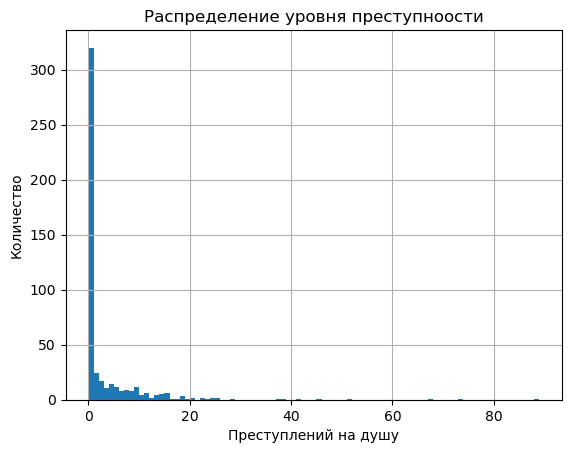

In [15]:
df.CRIM.hist(bins=range(90))
plt.title('Распределение уровня преступноости')
plt.xlabel('Преступлений на душу')
plt.ylabel('Количество')
plt.show()

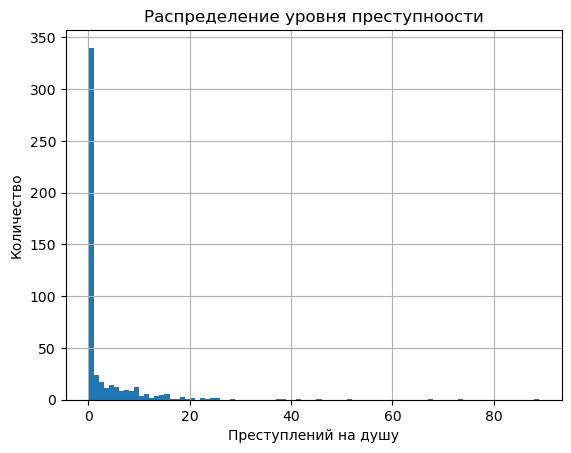

In [16]:
df = df.fillna(value={"CRIM": 0})

df.CRIM.hist(bins=range(90))
plt.title('Распределение уровня преступноости')
plt.xlabel('Преступлений на душу')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "ZN" в соответствии с описанием "ZN - proportion of residential land zoned for lots over 25,000 sq.ft."

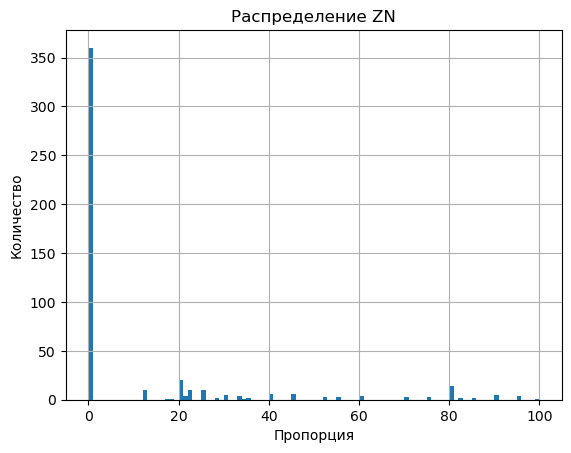

In [18]:
df.ZN.hist(bins=range(101))
plt.title('Распределение ZN')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

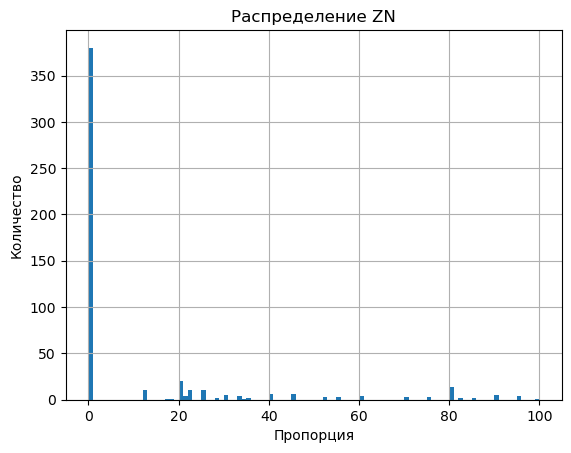

In [19]:
df = df.fillna(value={"ZN": 0})

df.ZN.hist(bins=range(101))
plt.title('Распределение ZN')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "INDUS" в соответствии с описанием "INDUS - proportion of non-retail business acres per town."

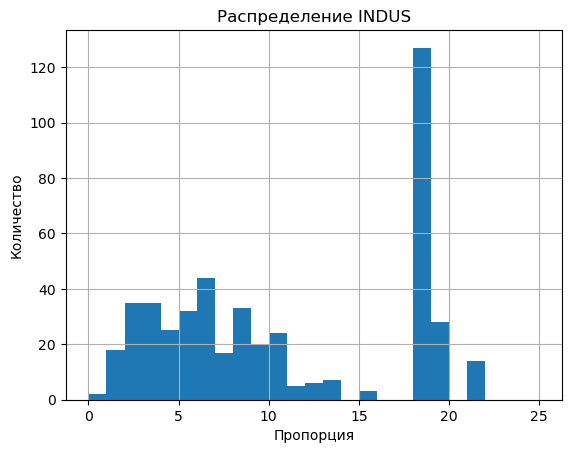

In [21]:
df.INDUS.hist(bins=range(26))
plt.title('Распределение INDUS')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

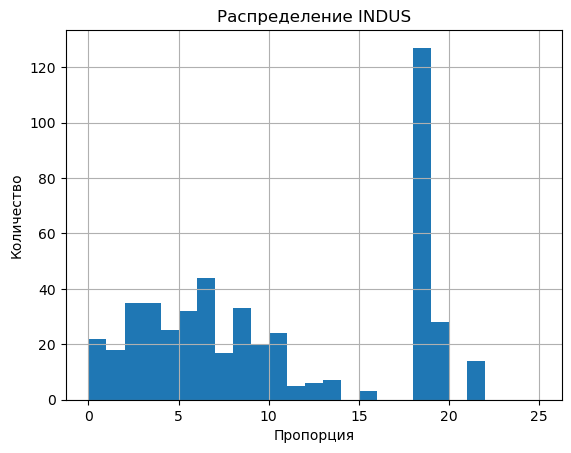

In [22]:
df = df.fillna(value={"INDUS": 0})

df.INDUS.hist(bins=range(26))
plt.title('Распределение INDUS')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Не удаляю пропуски в категориальном признаке "CHAS" в соответствии с описанием "CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)", считая, что они информативны

In [24]:
df = df.fillna(value={"CHAS": 2})

## Заполняю пропуски в численном признаке "AGE" в соответствии с описанием "AGE - proportion of owner-occupied units built prior to 1940"

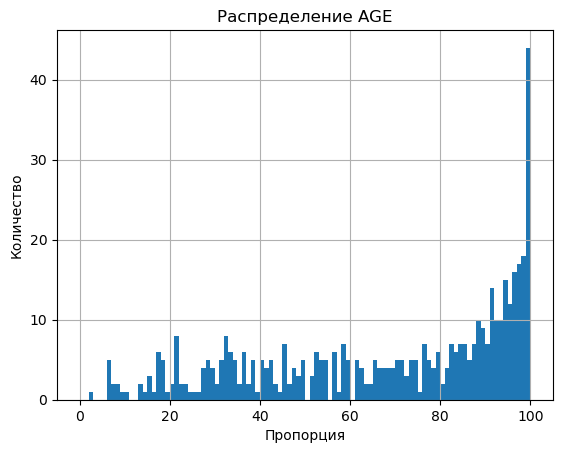

In [26]:
df.AGE.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

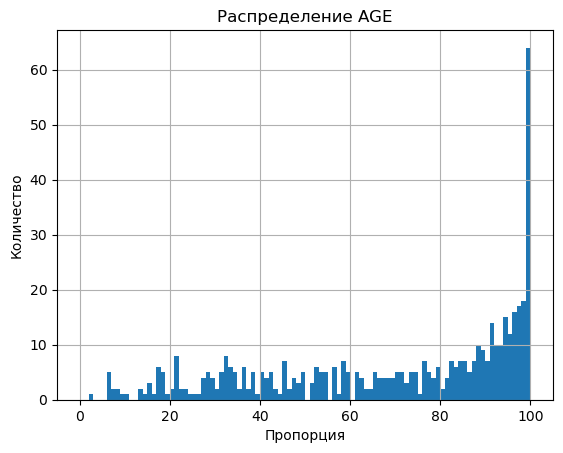

In [27]:
df = df.fillna(value={"AGE": 100})

df.AGE.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "LSTAT" в соответствии с описанием "LSTAT - % lower status of the population"

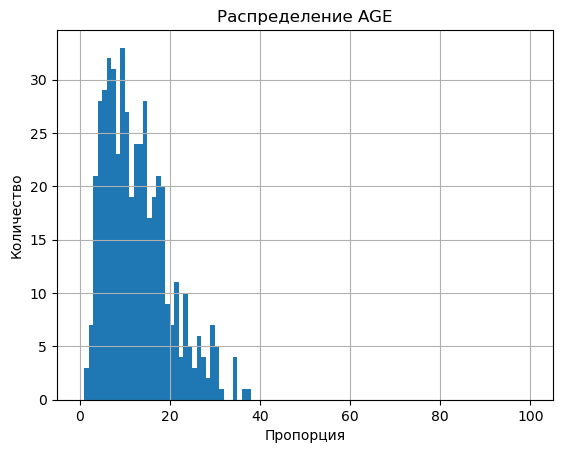

In [29]:
df.LSTAT.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

11.43


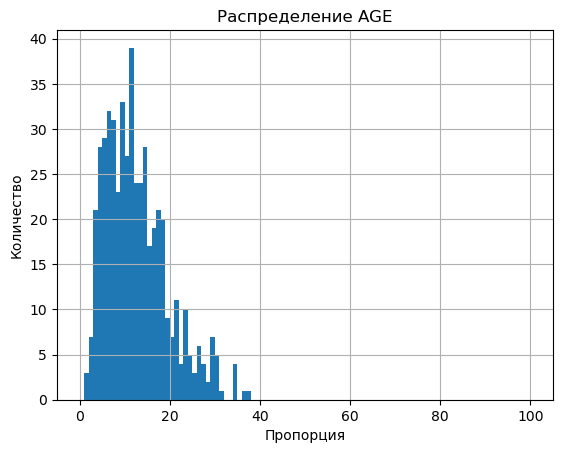

In [30]:
med = df.LSTAT.median()
print(med)
df = df.fillna(value={"LSTAT": int(med)})

df.LSTAT.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

In [31]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Преобразую категориальные признаки (one hot encoding)

In [33]:
for to_enc in ["CHAS"]:
    one_hot = pd.get_dummies(df[to_enc]).astype(int)
    del df[to_enc]
    df = df.join(one_hot)
df.columns = df.columns.map(str)
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,0.0,1.0,2.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.00,36.2,1,0,0


## Провожу разделение на тестовую и обучающую выборки, обучаю и тестирую дерево решений и градиентный спуск, оцениваю с помощью MAE, MSE

In [35]:
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   return("{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

In [36]:
y = df.MEDV.copy()
X = df.loc[:, df.columns != "MEDV"].copy()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
model = DecisionTreeRegressor(max_depth=7, random_state=42)

start = time.time()
model.fit(X_train, y_train)
end = time.time()
fitTime = exec_time(start, end)

start = time.time()
y_pred = model.predict(X_test)
end = time.time()
testTime = exec_time(start, end)

start = time.time()
y_train_pred = model.predict(X_train)
end = time.time()
trainTime = exec_time(start, end)

testMAE = mean_absolute_error(y_test, y_pred)
trainMAE = mean_absolute_error(y_train, y_train_pred)
testMSE = mean_squared_error(y_test, y_pred)
trainMSE = mean_squared_error(y_train, y_train_pred)
print("Test MAE = %.4f" % testMAE)
print("Train MAE = %.4f" % trainMAE)
print("Test MAE = %.4f" % testMSE)
print("Train MAE = %.4f" % trainMSE)

Test MAE = 3.0789
Train MAE = 1.1071
Test MAE = 22.0780
Train MAE = 2.3430


In [39]:
DecisionTreeRegressorMAE = pd.DataFrame({
    "Train MAE" : [trainMAE],
    "Test MAE" : [testMAE],
    "Train MSE" : [trainMSE],
    "Test MSE" : [testMSE],
    "Fit time" : [fitTime],
    "Test time on train df" : [trainTime],
    "Test time on test df" : [testTime],
}, index=["DecisionTreeRegressor"])
DecisionTreeRegressorMAE

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
DecisionTreeRegressor,1.10706,3.078884,2.342959,22.077968,00:00:00,00:00:00,00:00:00


In [40]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
model.fit(X_train, y_train)

start = time.time()
model.fit(X_train, y_train)
end = time.time()
fitTime = exec_time(start, end)

start = time.time()
y_pred = model.predict(X_test)
end = time.time()
testTime = exec_time(start, end)

start = time.time()
y_train_pred = model.predict(X_train)
end = time.time()
trainTime = exec_time(start, end)

testMAE = mean_absolute_error(y_test, y_pred)
trainMAE = mean_absolute_error(y_train, y_train_pred)
testMSE = mean_squared_error(y_test, y_pred)
trainMSE = mean_squared_error(y_train, y_train_pred)
print("Test MAE = %.4f" % testMAE)
print("Train MAE = %.4f" % trainMAE)
print("Test MAE = %.4f" % testMSE)
print("Train MAE = %.4f" % trainMSE)

Test MAE = 2.3752
Train MAE = 2.3479
Test MAE = 13.3203
Train MAE = 10.6762


In [41]:
GradientBoostingRegressorMAE = pd.DataFrame({
    "Train MAE" : [trainMAE],
    "Test MAE" : [testMAE],
    "Train MSE" : [trainMSE],
    "Test MSE" : [testMSE],
    "Fit time" : [fitTime],
    "Test time on train df" : [trainTime],
    "Test time on test df" : [testTime],
}, index=["GradientBoostingRegressor"])
GradientBoostingRegressorMAE

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
GradientBoostingRegressor,2.34794,2.37517,10.676245,13.320328,00:00:00,00:00:00,00:00:00


In [42]:
AllMAE = pd.concat([DecisionTreeRegressorMAE, GradientBoostingRegressorMAE])
AllMAE.sort_values(by=["Test MAE"])

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
GradientBoostingRegressor,2.34794,2.375170,10.676245,13.320328,00:00:00,00:00:00,00:00:00
DecisionTreeRegressor,1.10706,3.078884,2.342959,22.077968,00:00:00,00:00:00,00:00:00


## Выводы 
Использовал MAE и MSE из-за простоты и популярности данных метрик.<br>Однако обе модели плохо обучены из-за малого набора данных с большим количеством пропусков. Также не получилось исследовать скорость обучения и предсказания на малом наборе данных.